In [1]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd
#plt.rcParams["figure.figsize"] = (10,7)

alphas = [-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20]
fs = 15
title_fs = 18
legend_fs = 12
ticks_fs = 16


#folder = '2d_comparisons_et_each_step/'
folder = '2d_comparisons_et_only_once_from_ground/'

In [2]:
sdata = pd.read_csv(folder + 'polar-data2d.csv')
cdata = pd.read_csv(folder + 'cart-data2d.csv')

sdata['V_rel_block'] = sdata.apply(lambda row: row.V_block_fin - row.Wind_x, axis=1)
cdata['V_rel_block'] = cdata.apply(lambda row: row.V_block_fin - row.Wind_x, axis=1)

time = cdata['TotTime'].max()

cdata.tail(4)

,Iter,TotTime,m_block,Alpha,Theta0,Theta_fin,V_theta_fin,V_block_fin,Wind_x,Wind_y,Vkitex,Vkitez,Vrelx,Vrelz,F_vinc,Tension,Lift,Drag,Stability,V_rel_block
311,2000000,200.0,40.0,20.0,0.0,1.37,0.0,25.87,35.0,0.0,25.87,-0.0,-9.13,-0.0,134.01,263.89,268.19,53.64,1,-9.13
312,2000000,200.0,40.0,20.0,0.0,1.37,0.0,27.87,37.0,0.0,27.87,-0.0,-9.13,-0.0,134.01,263.89,268.19,53.64,1,-9.13
313,2000000,200.0,40.0,20.0,0.0,1.37,0.0,29.87,39.0,0.0,29.87,-0.0,-9.13,-0.0,134.01,263.89,268.19,53.64,1,-9.13
314,2000000,200.0,40.0,20.0,0.0,1.37,0.0,31.87,41.0,0.0,31.87,-0.0,-9.13,-0.0,134.01,263.89,268.19,53.64,1,-9.13


## 1) Block velocities as a function of the attack angle for various wind velocities

In [18]:
wmin = 4
wmax = 25
step = 2

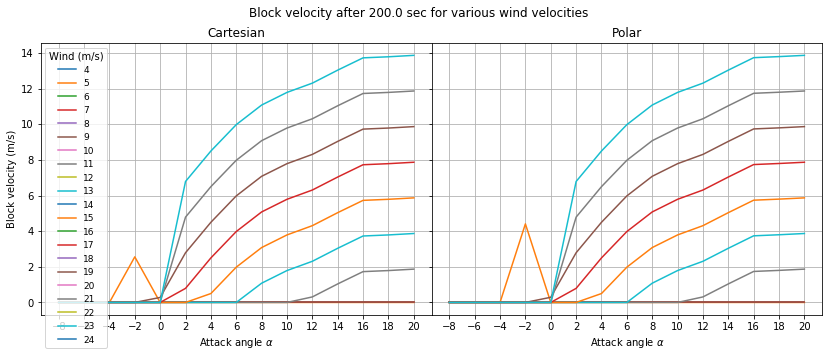

In [19]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 5), gridspec_kw={'wspace': 0})

for w in range(wmin, wmax): 
    
    fig.suptitle("Block velocity after " + str(time) + " sec for various wind velocities")

    wdf = cdata.loc[cdata['Wind_x'] == float(w)]
    #print(wdf.head(4))
    axs[0].plot(wdf['Alpha'], wdf['V_block_fin'], label=str(w))
    plt.grid(b=True)

    wdf = sdata.loc[sdata['Wind_x'] == float(w)]
    wdf.head(2)
    axs[1].plot(wdf['Alpha'], wdf['V_block_fin'], label=str(w))
    axs[0].grid(b=True)

    axs[0].legend(title = r'Wind (m/s)', fontsize = legend_fs, loc='upper left', prop={"size":9})
    axs[0].set_ylabel('Block velocity (m/s)')
    #axs[0].set_xlim(0,20)

    axs[0].set_title("Cartesian")
    axs[1].set_title("Polar")
    
for ax in axs.flat:
    ax.set(xlabel='Attack angle ' + r'$\alpha$')
    ax.set_xticks(alphas)
    
#plt.savefig('Images/vblock_cart-pol.png')

###  a) Cartesian coordinates

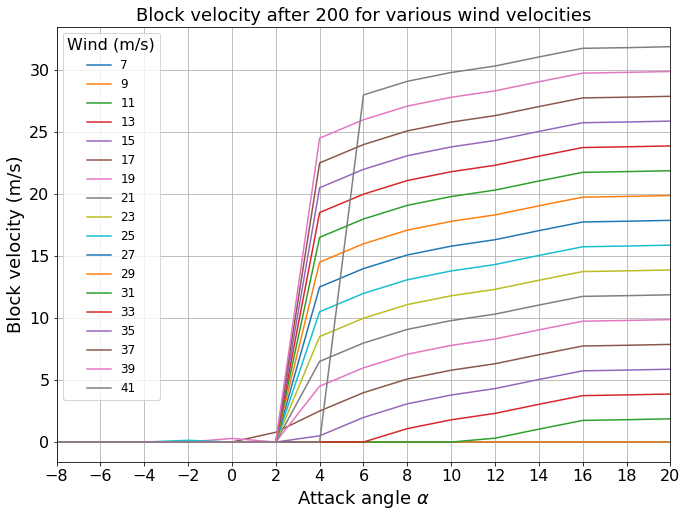

In [40]:
fig, axs = plt.subplots(1, 1, figsize=(11,8), gridspec_kw={'wspace': 0})

for w in range(wmin, wmax, step): 
    wdf = cdata.loc[cdata['Wind_x'] == float(w)]
    axs.plot(wdf['Alpha'], wdf['V_block_fin'], label=str(w))
    axs.set_ylabel('Block velocity (m/s)', fontsize=fs+3)
    axs.set_xlabel('Attack angle ' + r'$\alpha$', fontsize=fs+3)
    axs.set_title("Block velocity after "+ str(int(time)) + " for various wind velocities", fontsize=title_fs)
    leg = axs.legend(title = r'Wind (m/s)', fontsize = legend_fs, loc='upper left')
    axs.set_xlim(-8,20)
    axs.tick_params(axis='both', labelsize=ticks_fs)
    leg.get_title().set_fontsize(ticks_fs)
    axs.set_xticks([-8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
    plt.grid(b=True)
    
    
#plt.savefig('Images/vblock_alpha_cartesian.png')

###  b) Polar coordinates

for w in range(wmin, wmax, step): 
    wdf = sdata.loc[cdata['Wind_x'] == float(w)]
    plt.plot(wdf['Alpha'], wdf['V_block_fin'], label=str(w))
    plt.ylabel('Block velocity (m/s)', fontsize=fs)
    plt.xlabel('Attack angle ' + r'$\alpha$', fontsize=fs)
    plt.title("Block velocity after 300 sec for various wind velocities")
    plt.legend(title = 'Wind (m/s)', fontsize = legend_fs, loc='upper left')
    plt.grid(b=True)

## 2) Kite relative velocity as a function of wind velocities for various alpha

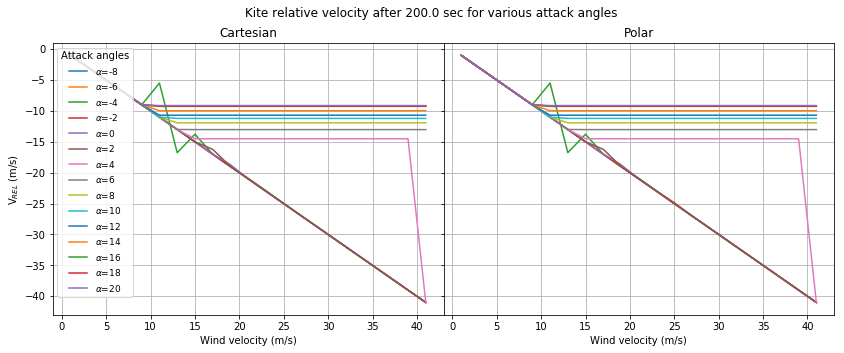

In [12]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 5), gridspec_kw={'wspace': 0})

for i, angle in enumerate(alphas): 
    
    fig.suptitle("Kite relative velocity after " + str(time) + " sec for various attack angles")
    
    wdfc = cdata.loc[cdata['Alpha'] == angle]

    axs[0].plot(wdfc['Wind_x'], wdfc['Vrelx'], label=r'$\alpha$='+str(angle))
    plt.grid(b=True)
    
    wdfs = sdata.loc[sdata['Alpha'] == angle]
    axs[1].plot(wdfs['Wind_x'], wdfs['Vrelx'], label=r'$\alpha$='+str(angle))
    axs[0].grid(b=True)
    
    axs[0].legend(title = r'Attack angles', fontsize = legend_fs, loc='upper left', prop={"size":9})
    axs[0].set_ylabel(r'V$_{REL}$ (m/s)')
    
    axs[0].set_title("Cartesian")
    axs[1].set_title("Polar")
    
for ax in axs.flat:
    ax.set(xlabel='Wind velocity (m/s)')
    
#plt.savefig('Images/vrel_wind_negative_pi4.png')

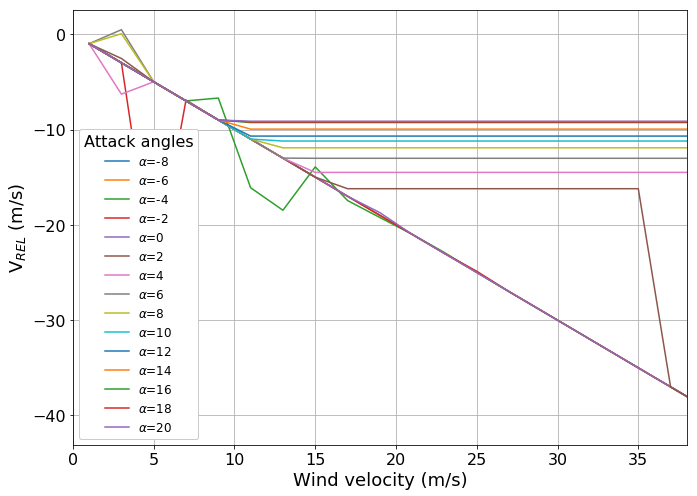

In [37]:
fig, axs = plt.subplots(1, 1, figsize=(11,8), gridspec_kw={'wspace': 0})

for i, angle in enumerate(alphas): 
    
    wdfc = cdata.loc[cdata['Alpha'] == angle]
    axs.plot(wdfc['Wind_x'], wdfc['Vrelx'], label=r'$\alpha$='+str(angle))
    axs.set_ylabel(r'V$_{REL}$ (m/s)', fontsize=fs+3)
    axs.set_xlabel('Wind velocity (m/s)', fontsize=fs+3)
    #axs.set_title("Kite relative velocity after " + str(time) + " sec for various attack angles", fontsize=title_fs)
    leg = axs.legend(title = r'Attack angles', fontsize = 12,loc='lower left',framealpha=1)
    
    axs.set_xlim(0,38)
    axs.tick_params(axis='both', labelsize=ticks_fs)
    leg.get_title().set_fontsize(ticks_fs)
    #axs.set_xticks([-8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
    plt.grid(b=True)
    
    
plt.savefig('Images/vrel_wind_cartesian1.png', dpi=300)

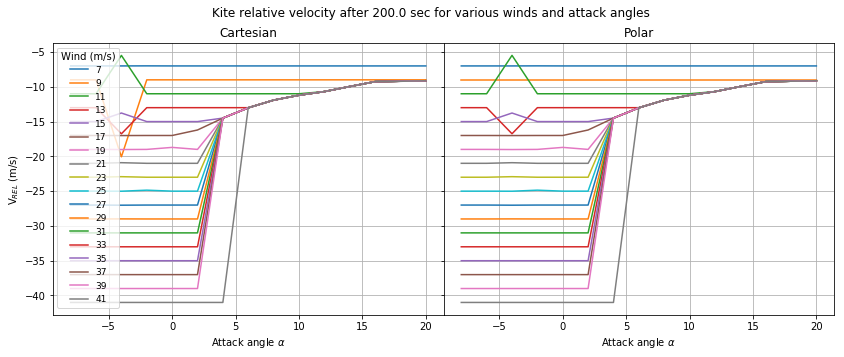

In [34]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 5), gridspec_kw={'wspace': 0})

for w in range(wmin, wmax, step): 
    
    fig.suptitle("Kite relative velocity after " + str(time) + " sec for various winds and attack angles")
    
    wdfc = cdata.loc[cdata['Wind_x'] == float(w)]
    axs[0].plot(wdfc['Alpha'], wdfc['Vrelx'], label=str(w))
    plt.grid(b=True)
    
    wdfs = sdata.loc[sdata['Wind_x'] == float(w)]
    axs[1].plot(wdfs['Alpha'], wdfs['Vrelx'], label=str(w))
    axs[0].grid(b=True)
    
    axs[0].legend(title = r'Wind (m/s)', fontsize = legend_fs, loc='upper left', prop={"size":9})
    axs[0].set_ylabel(r'V$_{REL}$ (m/s)')
    
    axs[0].set_title("Cartesian")
    axs[1].set_title("Polar")
    
for ax in axs.flat:
    ax.set(xlabel='Attack angle ' + r'$\alpha$')
    
#plt.savefig('Images/vrel_alpha_negative_pi4.png')

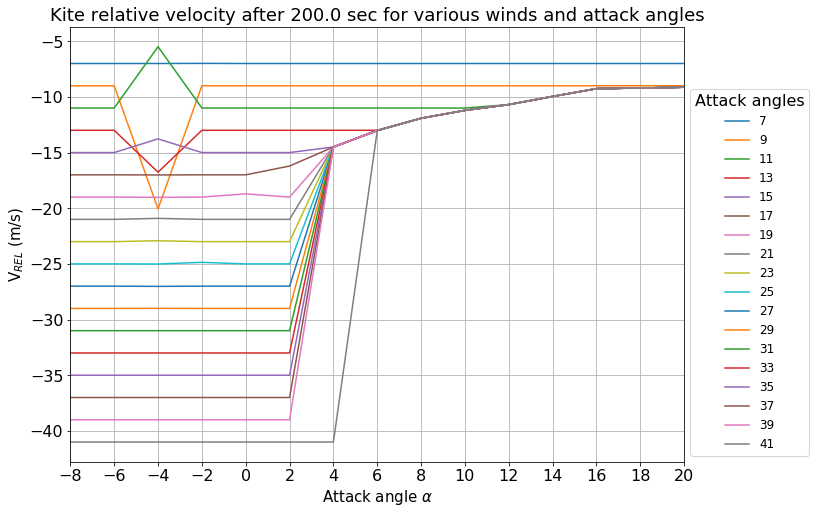

In [36]:
fig, axs = plt.subplots(1, 1, figsize=(11,8), gridspec_kw={'wspace': 0})

for w in range(wmin, wmax, step): 
    
    wdfc = cdata.loc[cdata['Wind_x'] == float(w)]
    axs.plot(wdfc['Alpha'], wdfc['Vrelx'], label=str(w))
    axs.set_ylabel(r'V$_{REL}$ (m/s)', fontsize=fs)
    axs.set_xlabel('Attack angle ' + r'$\alpha$', fontsize=fs)
    axs.set_title("Kite relative velocity after " + str(time) + " sec for various winds and attack angles", fontsize=title_fs)
    leg = axs.legend(title = r'Attack angles', fontsize = legend_fs, loc='lower left', bbox_to_anchor=(1, 0))
    axs.set_xlim(-8,20)
    axs.tick_params(axis='both', labelsize=ticks_fs)
    leg.get_title().set_fontsize(ticks_fs)
    fontP = FontProperties()
    fontP.set_size('small')
    axs.set_xticks([-8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
    plt.grid(b=True)
    
    
#plt.savefig('Images/vrel_alpha_cartesian.png')